In [62]:
import pandas as pd
import numpy as np
### Data Collection
import pandas_datareader as pdr

In [63]:
key="" ##Tiingo keys

In [64]:
df = pdr.get_data_tiingo('AMC', api_key=key)

In [65]:
df.to_csv('AMC.csv')

In [66]:
import pandas as pd
from matplotlib import pyplot as plt

In [67]:
#@title Default title text
df=pd.read_csv('AMC.csv')

In [68]:
df.shape

(1257, 14)

In [69]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMC,2016-07-27 00:00:00+00:00,29.26,30.01,28.5901,29.87,396971,22.555746,23.133901,22.039338,23.025979,396971,0.0,1.0
1,AMC,2016-07-28 00:00:00+00:00,29.53,29.55,28.9150,29.10,339736,22.763882,22.779299,22.289795,22.432406,339736,0.0,1.0
2,AMC,2016-07-29 00:00:00+00:00,29.42,29.91,29.1300,29.46,396301,22.679086,23.056814,22.455533,22.709921,396301,0.0,1.0
3,AMC,2016-08-01 00:00:00+00:00,28.46,29.05,27.3600,27.50,733602,21.939048,22.393863,21.091087,21.199009,733602,0.0,1.0
4,AMC,2016-08-02 00:00:00+00:00,27.83,28.51,27.8100,28.51,314265,21.453398,21.977591,21.437980,21.977591,314265,0.0,1.0


In [70]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AMC,2016-07-27 00:00:00+00:00,29.26,30.01,28.5901,29.87,396971,22.555746,23.133901,22.039338,23.025979,396971,0.0,1.0
1,AMC,2016-07-28 00:00:00+00:00,29.53,29.55,28.9150,29.10,339736,22.763882,22.779299,22.289795,22.432406,339736,0.0,1.0
2,AMC,2016-07-29 00:00:00+00:00,29.42,29.91,29.1300,29.46,396301,22.679086,23.056814,22.455533,22.709921,396301,0.0,1.0
3,AMC,2016-08-01 00:00:00+00:00,28.46,29.05,27.3600,27.50,733602,21.939048,22.393863,21.091087,21.199009,733602,0.0,1.0
4,AMC,2016-08-02 00:00:00+00:00,27.83,28.51,27.8100,28.51,314265,21.453398,21.977591,21.437980,21.977591,314265,0.0,1.0


In [71]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AMC,2021-07-19 00:00:00+00:00,34.62,35.34,31.15,32.95,112891310,34.62,35.34,31.15,32.95,112891310,0.0,1.0
1253,AMC,2021-07-20 00:00:00+00:00,43.09,44.39,35.13,35.14,168673390,43.09,44.39,35.13,35.14,168673390,0.0,1.0
1254,AMC,2021-07-21 00:00:00+00:00,40.78,46.55,40.11,41.80,158023665,40.78,46.55,40.11,41.80,158023665,0.0,1.0
1255,AMC,2021-07-22 00:00:00+00:00,37.24,41.74,37.15,40.16,93985854,37.24,41.74,37.15,40.16,93985854,0.0,1.0
1256,AMC,2021-07-23 00:00:00+00:00,36.99,38.40,34.69,37.78,85474775,36.99,38.40,34.69,37.78,85474775,0.0,1.0


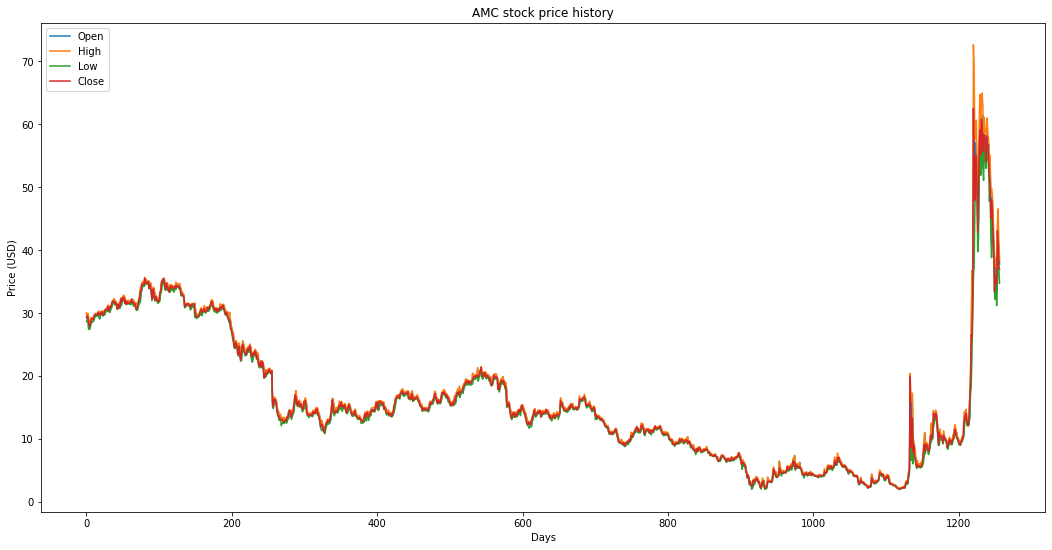

In [72]:
from matplotlib import pyplot as plt
plt.figure(figsize = (18,9))
plt.plot(df["open"])
plt.plot(df["high"])
plt.plot(df["low"])
plt.plot(df["close"])
plt.title('AMC stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

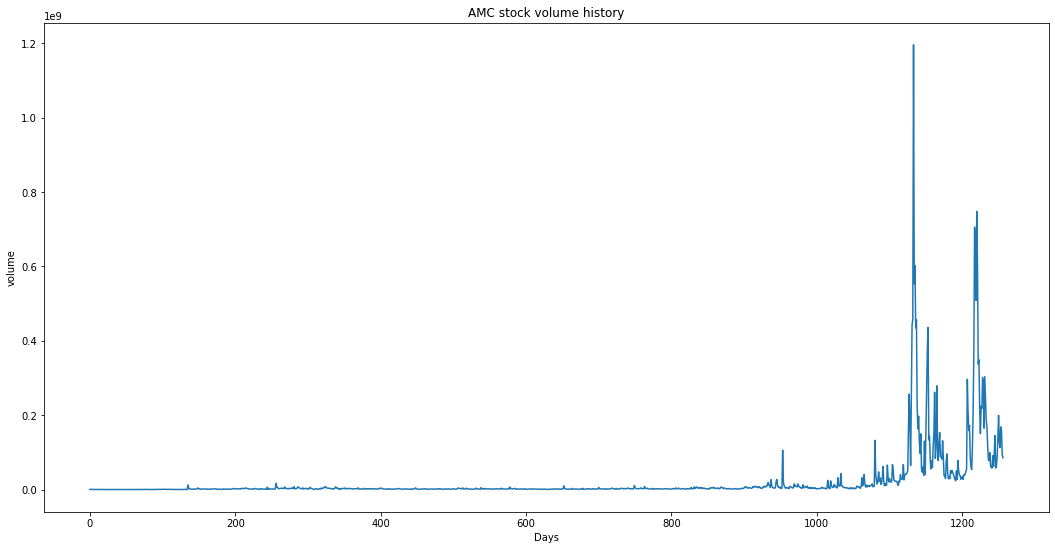

In [73]:
#check out the plot for volume
plt.figure(figsize = (18,9))
plt.plot(df["volume"])
plt.title('AMC stock volume history')
plt.ylabel('volume')
plt.xlabel('Days')
plt.show()

In [74]:
print("checking if any null values are present\n", df.isna().sum())

checking if any null values are present
 symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


In [75]:
df = df.sort_values('date')

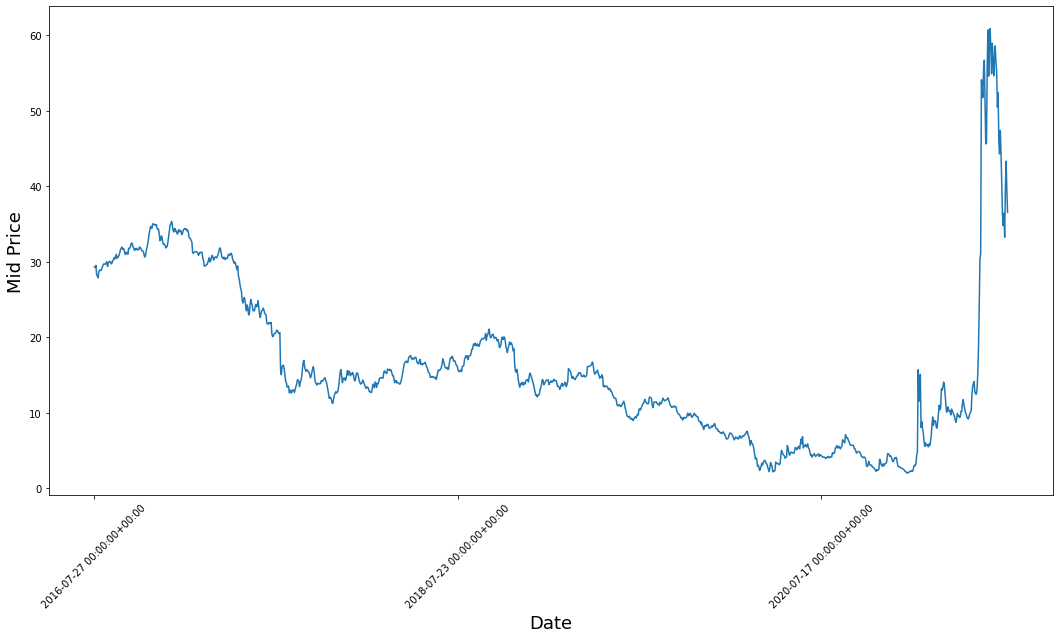

In [76]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [77]:
#creating a saparate dataframe with only Close column
stock_close_data=df.reset_index()['close']

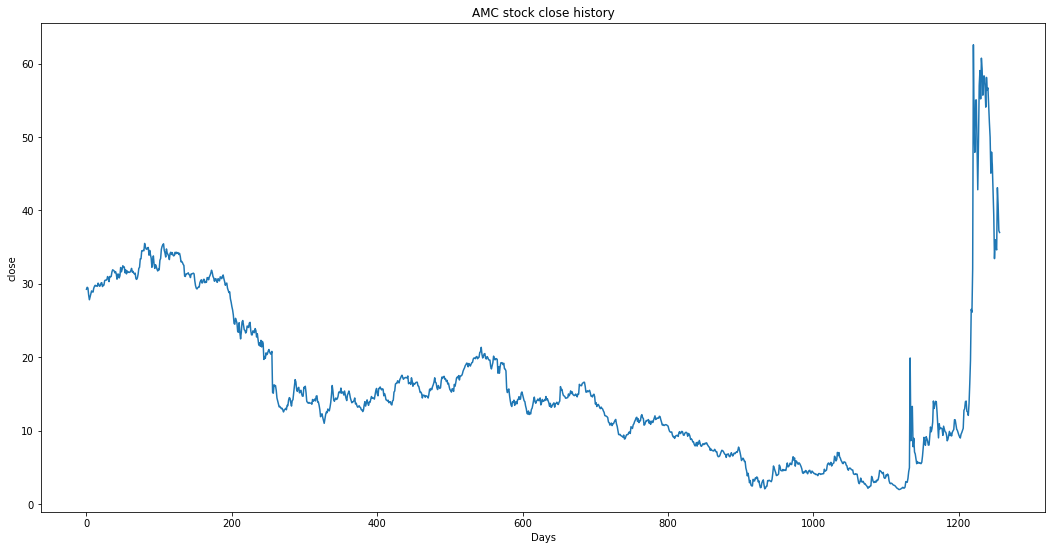

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,9))
plt.plot(stock_close_data)
plt.title('AMC stock close history')
plt.ylabel('close')
plt.xlabel('Days')
plt.show()

In [79]:
stock_close_data

0       29.26
1       29.53
2       29.42
3       28.46
4       27.83
        ...  
1252    34.62
1253    43.09
1254    40.78
1255    37.24
1256    36.99
Name: close, Length: 1257, dtype: float64

In [80]:
#sklearn providing utility function for standization or scaling data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_close_data=scaler.fit_transform(np.array(stock_close_data).reshape(-1,1))

In [81]:
stock_close_data.shape , print(stock_close_data)

[[0.45038798]
 [0.45484563]
 [0.45302955]
 ...
 [0.64058115]
 [0.58213637]
 [0.57800892]]


((1257, 1), None)

In [82]:
##splitting dataset into train and test split
training_size=int(len(stock_close_data)*0.65)

In [83]:
test_size=len(stock_close_data)-training_size

In [84]:
train_data,test_data=stock_close_data[0:training_size,:],stock_close_data[training_size:len(stock_close_data),:1]

In [85]:
training_size,test_size

(817, 440)

In [86]:
train_data

array([[0.45038798],
       [0.45484563],
       [0.45302955],
       [0.43718012],
       [0.42677893],
       [0.43338286],
       [0.44048209],
       [0.44659072],
       [0.44477464],
       [0.44394915],
       [0.45269936],
       [0.45682681],
       [0.45930329],
       [0.4578174 ],
       [0.45847779],
       [0.45699191],
       [0.46409113],
       [0.46111937],
       [0.45699191],
       [0.45847779],
       [0.46425623],
       [0.46524682],
       [0.45649662],
       [0.45913819],
       [0.45963348],
       [0.46953938],
       [0.47102526],
       [0.47086016],
       [0.47135546],
       [0.47894998],
       [0.4763084 ],
       [0.4675582 ],
       [0.47911507],
       [0.47828958],
       [0.47911507],
       [0.48918607],
       [0.49413901],
       [0.49298333],
       [0.49182764],
       [0.48736999],
       [0.49001156],
       [0.48456332],
       [0.47300644],
       [0.48439822],
       [0.48423312],
       [0.47581311],
       [0.48060096],
       [0.499

In [87]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [88]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [89]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [90]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [91]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [92]:
### Create the Stacked LSTM model
import tensorflow as tf
tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [93]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.3))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [94]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [95]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 112ms/step - loss: 0.0215 - val_loss: 0.0286
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0055 - val_loss: 0.0211
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0031 - val_loss: 0.0170
Epoch 4/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0024 - val_loss: 0.0157
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0025 - val_loss: 0.0157
Epoch 6/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0019 - val_loss: 0.0154
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0017 - val_loss: 0.0148
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0017 - val_loss: 0.0150
Epoch 9/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0016 - val_loss: 0.0149
Epoch 10/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0015 - val_loss: 0.014

In [96]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [97]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [98]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

17.96486806409096

In [99]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

17.04054971720799

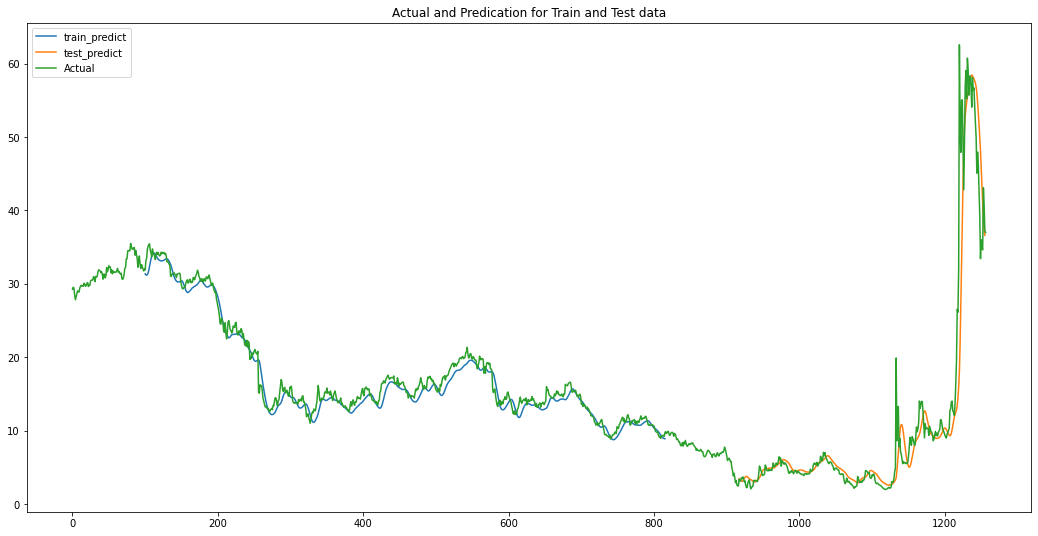

In [100]:
## Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(stock_close_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(stock_close_data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(stock_close_data)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize = (18,9))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(scaler.inverse_transform(stock_close_data))
plt.legend(['train_predict','test_predict','Actual'], loc='upper left')
plt.title('Actual and Predication for Train and Test data')
plt.show()

In [101]:
len(test_data)

440

In [102]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [103]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<20):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.5667771]
101
1 day input [0.09988443 0.10021463 0.12068681 0.14066369 0.12993231 0.13703153
 0.15156018 0.19910847 0.18226845 0.19118375 0.19844808 0.19729239
 0.17351824 0.14330527 0.11622916 0.14792802 0.13637114 0.13818722
 0.13818722 0.13587585 0.1218425  0.14247978 0.13571075 0.12993231
 0.12894172 0.12283309 0.10962523 0.11325739 0.1216774  0.1307578
 0.1213472  0.12679544 0.12052171 0.12877662 0.13224368 0.13505035
 0.15717352 0.15651313 0.14644213 0.13571075 0.13290408 0.12762093
 0.12233779 0.11870563 0.11589896 0.12431897 0.12811623 0.13323427
 0.13769193 0.17814099 0.18160806 0.19762259 0.19894337 0.17599472
 0.17450883 0.16674922 0.19316493 0.23823675 0.29024269 0.40515106
 0.39854714 0.49628529 1.         0.81492488 0.75829619 0.87535083
 0.87617632 0.78190523 0.67409609 0.78289582 0.90837048 0.94205052
 0.8783226  0.96995212 0.94568268 0.88674261 0.92933796 0.92983325
 0.90341753 0.8598316  0.92669638 0.89895988 0.90308734 0.86247317
 0.82516097 0.79214132 0.71140829 0

In [105]:
day_new=np.arange(1,101)
day_pred=np.arange(101,121)

In [106]:
import matplotlib.pyplot as plt

In [107]:
len(stock_close_data)

1257

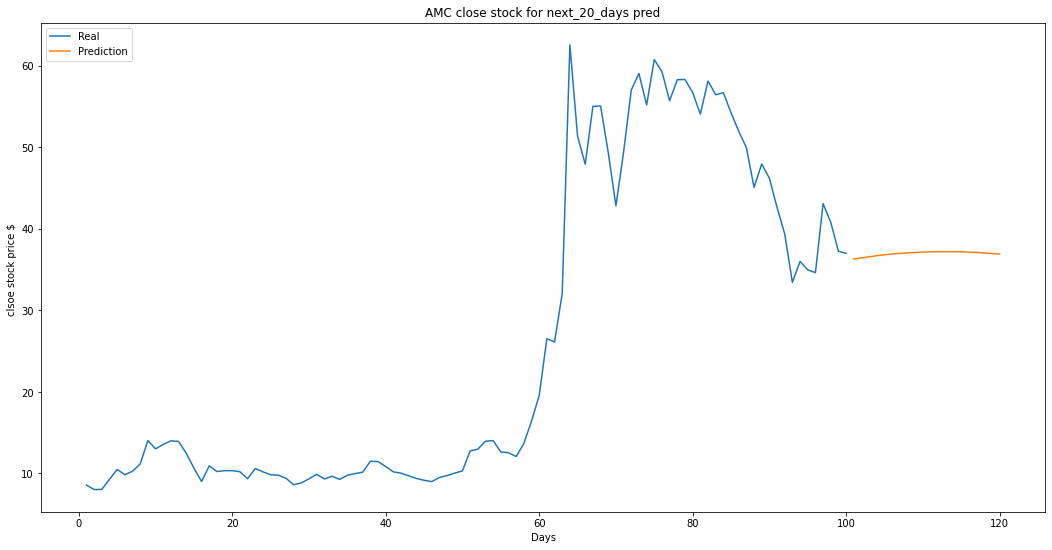

In [108]:
plt.figure(figsize = (18,9))
plt.plot(day_new,scaler.inverse_transform(stock_close_data[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('AMC close stock for next_20_days pred')
plt.ylabel('clsoe stock price $ ')
plt.legend(['Real','Prediction'], loc='upper left')
plt.xlabel('Days')
plt.show()